<a href="https://colab.research.google.com/github/nullPointerExcept10n/titanic-ML-project/blob/main/MODEL_20221202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/.shortcut-targets-by-id/1f4WLuAmHC7JJjiAzTdGvUjIEw1zxqyW_/titanicproject

/content/drive/.shortcut-targets-by-id/1f4WLuAmHC7JJjiAzTdGvUjIEw1zxqyW_/titanicproject


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [ ]:
test_data['Survived']=777   #test_data의 target 변수에 '777' 넣기
full_data=pd.concat([train_data, test_data],axis=0,ignore_index=True) #전처리 위해 train, test 데이터 결합

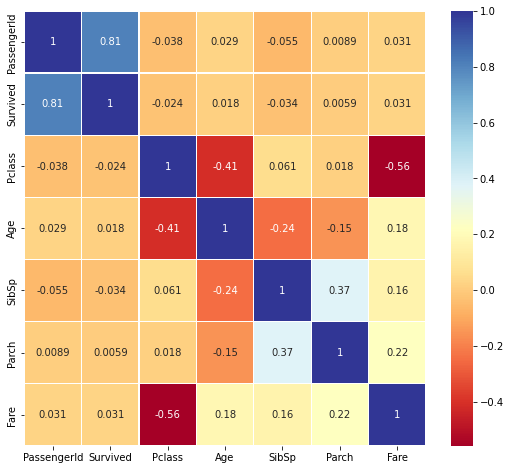

In [ ]:
corr_matrix = full_data.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='RdYlBu', annot=True, linewidths=0.2)

In [ ]:
# Age 결측치를 채우기 위해 parameter간의 상관관계 분석결과, age와의 상관관계가 높은
#pclass, sibsp, parch data를 사용해 평균을 내어 채우기로함

In [ ]:
full_data = full_data.drop(['PassengerId','Ticket','Cabin','Fare','Name'],axis = 1)
#승객 id, ticket번호, cabin(호수),fare, Name 제거

In [ ]:
full_data.Age.isnull().sum()

263

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [ ]:
full_data['Sex']=LabelEncoder().fit(['female','male']).transform(full_data['Sex'])

In [ ]:
full_data['Sex']

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [ ]:
bins = [-1,0,2,9] # Define bins as 
bins2 = [-1,0,3,10]
group_names = [0,1,2] #구간 구분
group_names2 = [0,1,2]

bin_sib = pd.cut(full_data['SibSp'],bins,labels=group_names)
bin_par = pd.cut(full_data['Parch'],bins2,labels=group_names2)
full_data['binsib'] = bin_sib
full_data['binpar'] = bin_par

#sib, parch 나누어서 정리 

In [ ]:
full_data = full_data.drop(['SibSp','Parch'],axis = 1)

In [ ]:
#train_data.groupby(['Sex', 'Pclass', 'SibSp', 'Parch'], as_index=False).mean() # 성별까지 고려한 경우 아직 이용안함

In [ ]:
#full_data.groupby(['Pclass', 'SibSp', 'Parch'], as_index=False).mean()
#결측치와 같은 조건의 데이터들 추출하고 평균 구하기

In [ ]:
full_data.groupby(['Pclass', 'binsib', 'binpar'], as_index=False).mean()

,Pclass,binsib,binpar,Survived,Sex,Age
0,1,0,0,248.031250,0.675000,40.488281
1,1,0,1,204.973684,0.394737,34.000000
2,1,0,2,NaN,NaN,NaN
3,1,1,0,265.817073,0.451220,39.618421
4,1,1,1,336.432432,0.459459,39.241081
5,1,1,2,388.500000,0.500000,62.000000
6,1,2,0,NaN,NaN,NaN
7,1,2,1,194.750000,0.250000,23.500000
8,1,2,2,NaN,NaN,NaN
9,2,0,0,265.784810,0.734177,32.218310


In [ ]:
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.binsib==0)&(full_data.binpar==0),'Age']=41
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.binsib==0)&(full_data.binpar==1),'Age']=34
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.binsib==1)&(full_data.binpar==0),'Age']=40
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==2)&(full_data.binsib==0)&(full_data.binpar==0),'Age']=32
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==0)&(full_data.binpar==0),'Age']=28
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==0)&(full_data.binpar==1),'Age']=21
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==0)&(full_data.binpar==2),'Age']=36
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==1)&(full_data.binpar==0),'Age']=26
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==1)&(full_data.binpar==1),'Age']=16
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==1)&(full_data.binpar==2),'Age']=41
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.binsib==2)&(full_data.binpar==1),'Age']=9

In [ ]:
full_data.Age.isnull().sum()

0

In [ ]:
full_data.Embarked.isnull().sum( )

2

In [ ]:
full_data.loc[(full_data.Embarked.isnull())&(full_data.Pclass==1),'Embarked']='S'

In [ ]:
full_data.Embarked.isnull().sum( )

0

In [ ]:
full_data['Embarked']=LabelEncoder().fit(['C','S','Q']).transform(full_data['Embarked'])

In [ ]:
full_data['Embarked']

0       2
1       0
2       2
3       2
4       2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Name: Embarked, Length: 1309, dtype: int64

In [ ]:
full_data = full_data.dropna()

In [ ]:
full_data.Age.isnull().sum()

0

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   int64   
 1   Pclass    1309 non-null   int64   
 2   Sex       1309 non-null   int64   
 3   Age       1309 non-null   float64 
 4   Embarked  1309 non-null   int64   
 5   binsib    1309 non-null   category
 6   binpar    1309 non-null   category
dtypes: category(2), float64(1), int64(4)
memory usage: 64.2 KB


In [ ]:
full_data['binsib']=LabelEncoder().fit([0,1,2]).transform(full_data['binsib'])

In [ ]:
full_data['binpar']=LabelEncoder().fit([0,1,2]).transform(full_data['binpar'])

In [ ]:
#Spiltting Test and Train Datas:
train_data_processed = full_data[full_data['Survived'] != 777]
test_data_processed  = full_data[full_data['Survived'] == 777]
#test의 target변수 제거
test_data_processed.drop(columns = 'Survived', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   binsib    891 non-null    int64  
 6   binpar    891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 55.7 KB


In [ ]:
test_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int64  
 4   binsib    418 non-null    int64  
 5   binpar    418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 22.9 KB


In [ ]:
train_data_processed.describe()

,Survived,Pclass,Sex,Age,Embarked,binsib,binpar
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.468204,1.536476,0.369248,0.369248
std,0.486592,0.836071,0.477990,13.427721,0.791503,0.580118,0.580118
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.500000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,2.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.750000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,2.000000,2.000000,2.000000


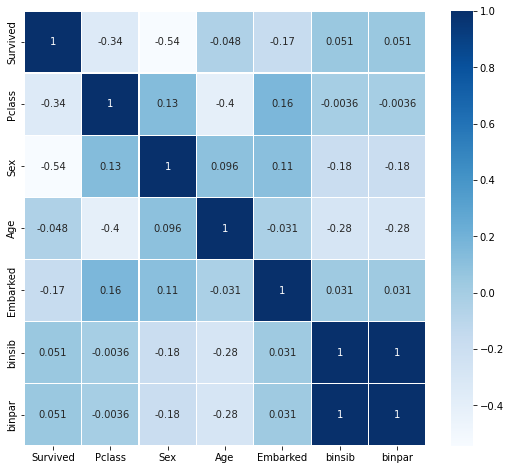

In [ ]:
corr_matrix = train_data_processed.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='Blues', annot=True, linewidths=0.2)

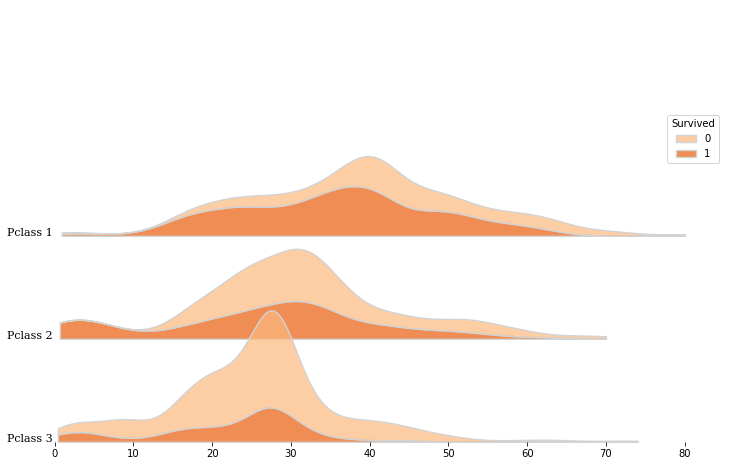

In [ ]:
#@title Age distribution in Pclasses in titanic
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(train_data_processed['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=train_data_processed[train_data_processed['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='Oranges', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.1)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
#fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show() 